In [ ]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/Copy of devnagari digit.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path="/content")


In [ ]:
pip install keras tensorflow


In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Task 1: Data Preparation
# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize((img_width, img_height))
            img = np.array(img) / 255.0
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Task 2: Build the FCN Model
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(64, activation="sigmoid"),
    layers.Dense(128, activation="sigmoid"),
    layers.Dense(256, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# Task 3: Compile the Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Task 4: Train the Model
batch_size = 128
epochs = 20

callbacks = [
    ModelCheckpoint(filepath="best_model.h5", save_best_only=True, monitor="val_loss", mode="min"),
    EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
]

history = model.fit(x_train, np.argmax(y_train, axis=1), batch_size=batch_size, epochs=epochs,
                    validation_split=0.2, callbacks=callbacks)


Epoch 1/20
100/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3132 - loss: 1.9695

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3278 - loss: 1.9419 - val_accuracy: 0.0000e+00 - val_loss: 7.7676
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8109 - loss: 0.5799 - val_accuracy: 0.0000e+00 - val_loss: 9.2888
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8826 - loss: 0.3262 - val_accuracy: 0.0000e+00 - val_loss: 9.7925
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9378 - loss: 0.2141 - val_accuracy: 0.0000e+00 - val_loss: 10.1898
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9557 - loss: 0.1561 - val_accuracy: 0.0000e+00 - val_loss: 10.4135


In [ ]:

# Task 5: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, np.argmax(y_test, axis=1), verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.6323 - loss: 2.1534
Test Accuracy: 0.6323


In [ ]:
# Task 6: Save and Load the Model
model.save("devnagari_fcn_model.h5")
loaded_model = keras.models.load_model("devnagari_fcn_model.h5")

In [ ]:
# Task 7: Making Predictions
predictions = loaded_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


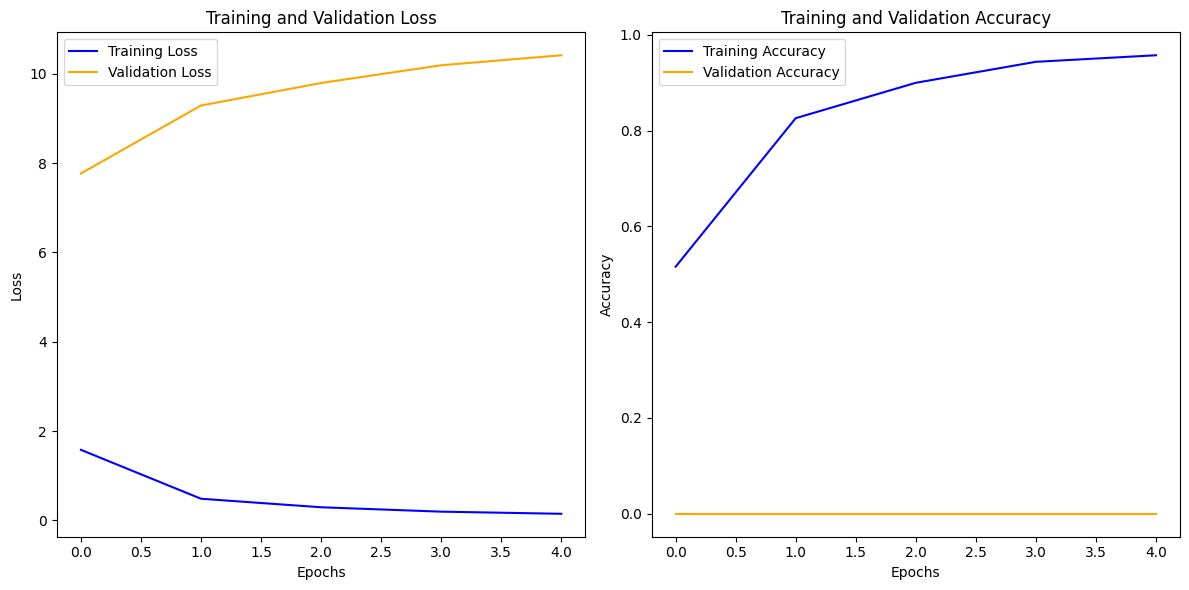

In [ ]:

# Visualization of Training Progress
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Test Accuracy: 0.6323


In [ ]:
model.save("devnagari_fcn_model.h5")